# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")
os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
current_directory = os.getcwd() # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

Summary plots

In [3]:
df_Exp_rev = json_to_df(current_directory + '\\Results\\' + 'Exp_revenue - Copy.json')
df_RT_rev = json_to_df(current_directory + '\\Results\\' + 'RT_revenue - Copy.json')


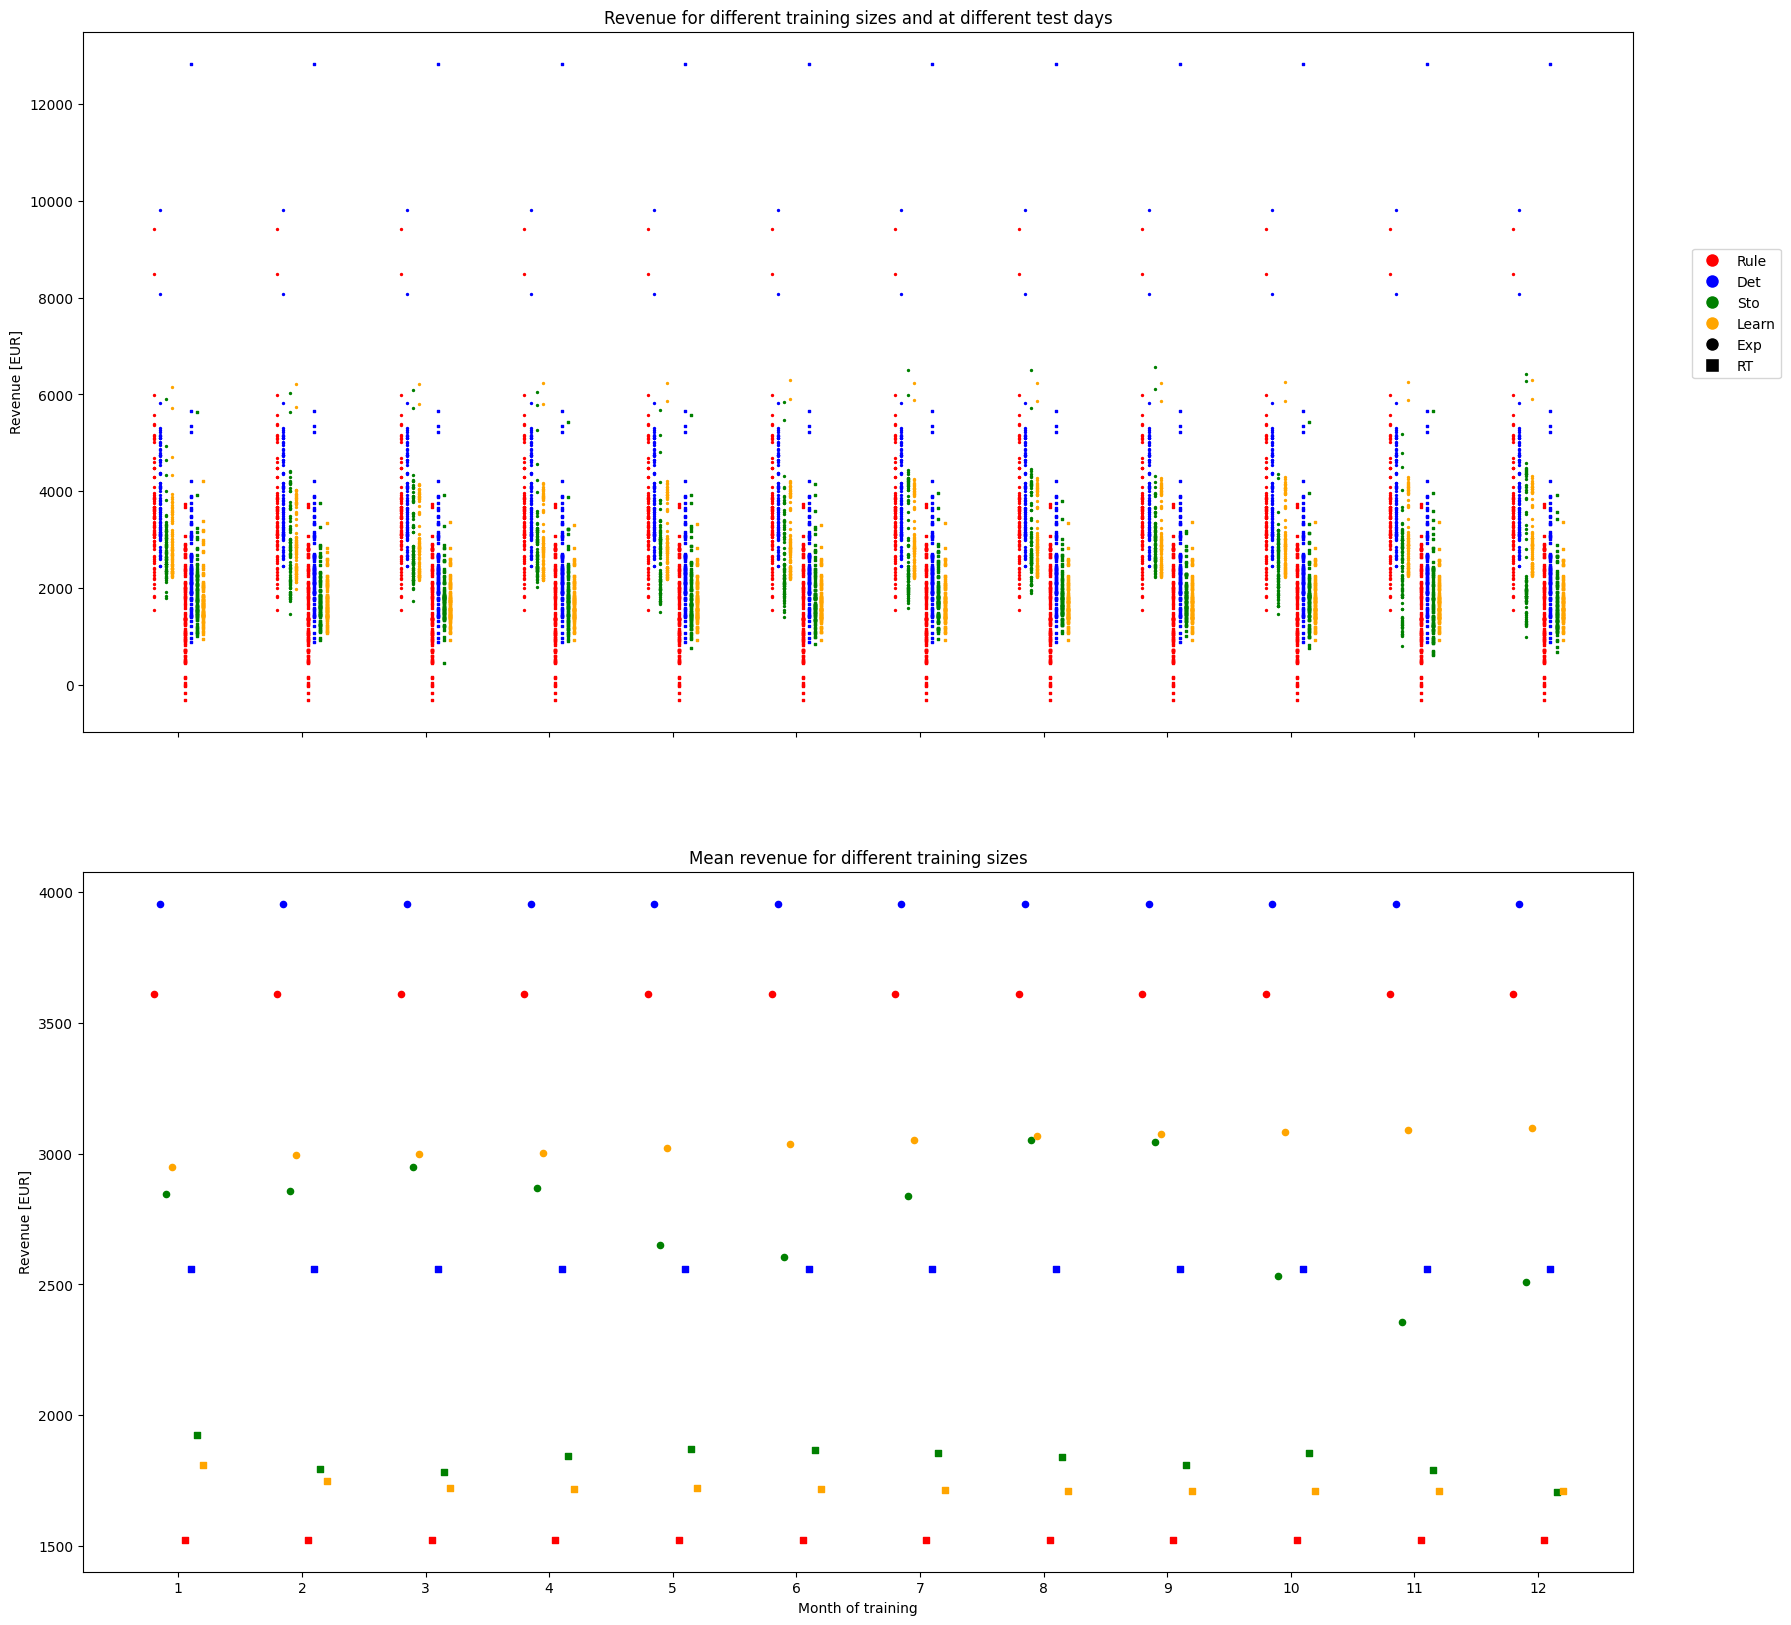

In [4]:
Array = Create_Array_from_Rev(df_Exp_rev,df_RT_rev)
plot_Revenue_Test(Array)

For a fixed day, see how the training size affects the results

In [16]:
fixd0 = [f'm{m}_d{0}_t{1}' for m in range(1,13)]
fixd30 = [f'm{m}_d{30}_t{31}' for m in range(1,13)]
fixd60 = [f'm{m}_d{60}_t{61}' for m in range(1,13)]

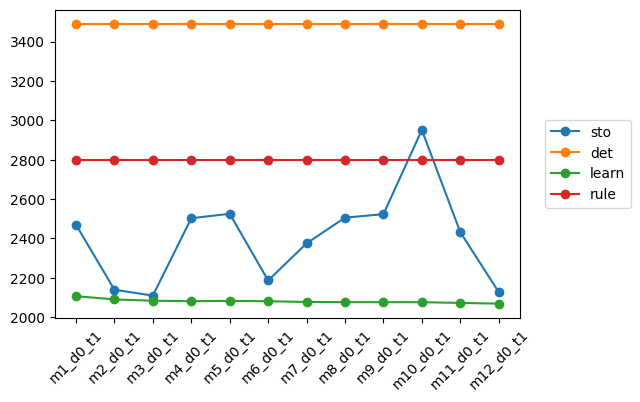

In [24]:
plt.figure(figsize=(6,4))
plt.plot(df_RT_rev[fixd0].T, 'o-')
plt.xticks(rotation = 45)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

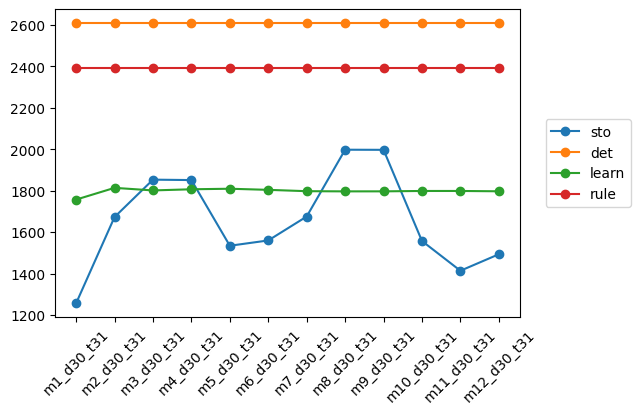

In [27]:
plt.figure(figsize=(6,4))
plt.plot(df_RT_rev[fixd30].T, 'o-')
plt.xticks(rotation = 45)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

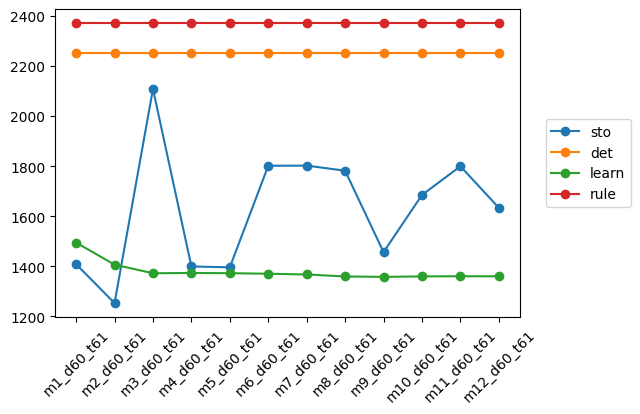

In [28]:
plt.figure(figsize=(6,4))
plt.plot(df_RT_rev[fixd60].T, 'o-')
plt.xticks(rotation = 45)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

For a fixed training size, see how the different days affects the results

In [29]:
fixm1 = [f'm{1}_d{d}_t{d+1}' for d in range(0,88)]
fixm6 = [f'm{6}_d{d}_t{d+1}' for d in range(0,88)]
fixm12 = [f'm{12}_d{d}_t{d+1}' for d in range(0,88)]

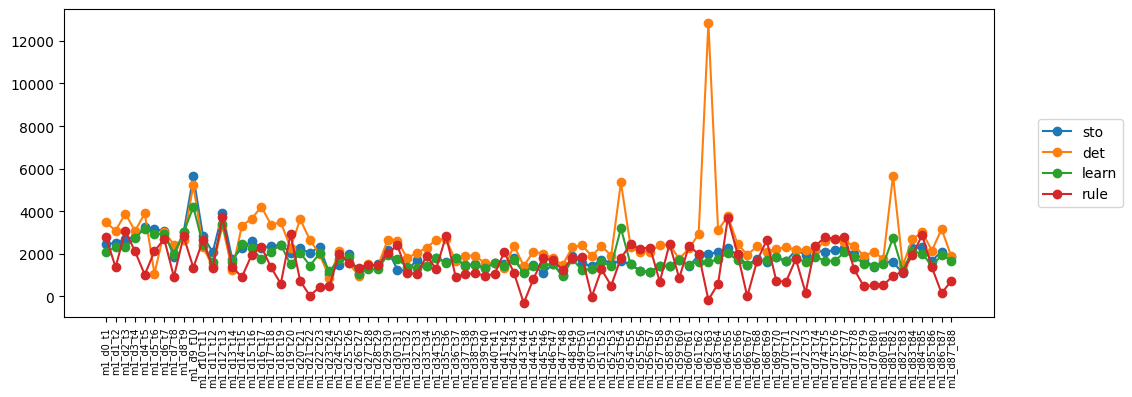

In [35]:
plt.figure(figsize=(12,4))
plt.plot(df_RT_rev[fixm1].T, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [36]:
df_RT_rev[fixm1].mean(axis=1)

sto      1923.305624
det      2559.495245
learn    1808.037151
rule     1522.911502
dtype: float64

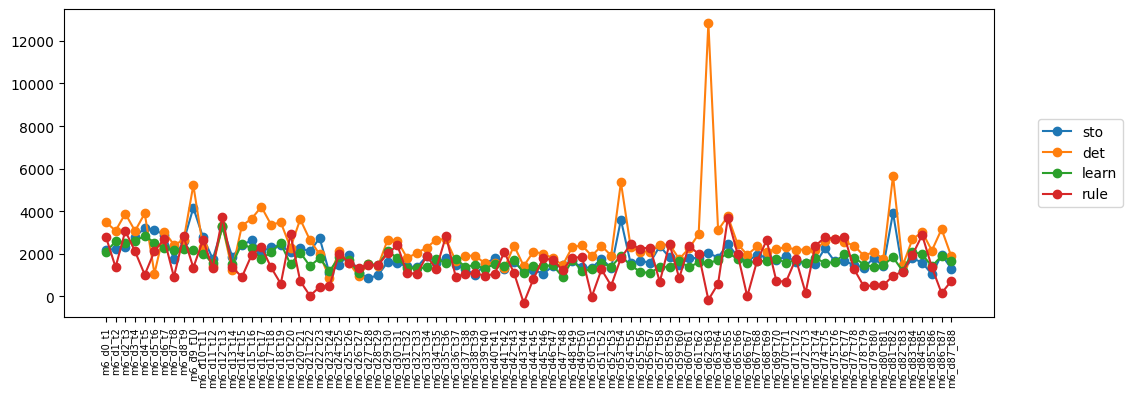

In [39]:
plt.figure(figsize=(12,4))
plt.plot(df_RT_rev[fixm6].T, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [40]:
df_RT_rev[fixm6].mean(axis=1)

sto      1868.516126
det      2559.495245
learn    1716.690401
rule     1522.911502
dtype: float64

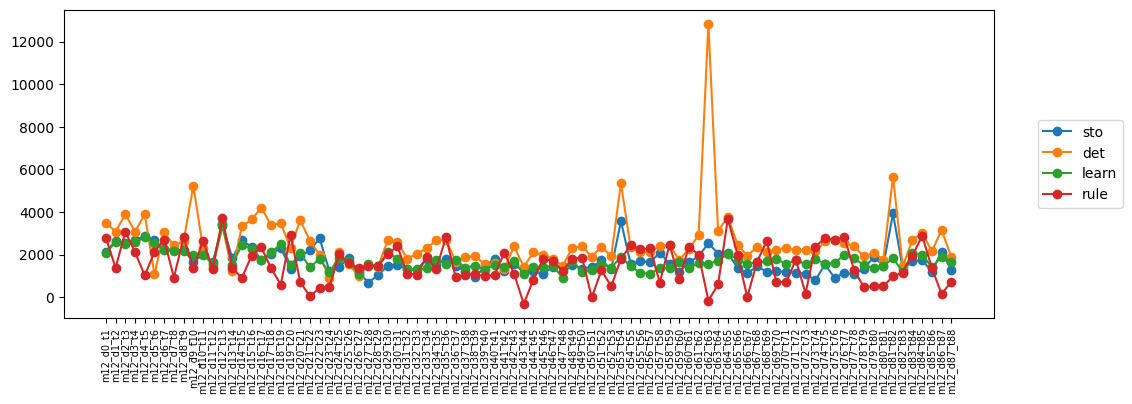

In [41]:
plt.figure(figsize=(12,4))
plt.plot(df_RT_rev[fixm12].T, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [45]:
df_RT_rev[fixm12].mean(axis=1)

sto      1706.864045
det      2559.495245
learn    1710.913251
rule     1522.911502
dtype: float64

### Open json results and plot
Plots: 
1) Bid quantity
2) bid price used for training 
3) bid price
4) accepted bid price
5) coefficients(learning)
6) Expected and RT revenue
7) Battery dynamics

### Test case: M1 d62 t63  
(Where deterministic model has a peak performance)

In [34]:
# Select plot parameters
choose_id = 'd5_d_upd0_t1'
save = True #True or False
model = 'Learn' # Rule, Det, Sto, Learn,
rev_plot = 'Learn' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
results = save_plots(current_directory, choose_id, save, model, with_acceptance, rev_plot);

Test case:  d5_d_upd0_t1
+----------+----------+-----------------+--------------+-------------------+
|          |     Rule |   Deterministic |   Stochastic |          Learning |
+==========+==========+=================+==============+===================+
| RT       |  450.411 |         186.955 |      184.289 | -610727           |
+----------+----------+-----------------+--------------+-------------------+
| Expected | 5622.32  |        6274.3   |     6217.45  |      -1.07921e+06 |
+----------+----------+-----------------+--------------+-------------------+


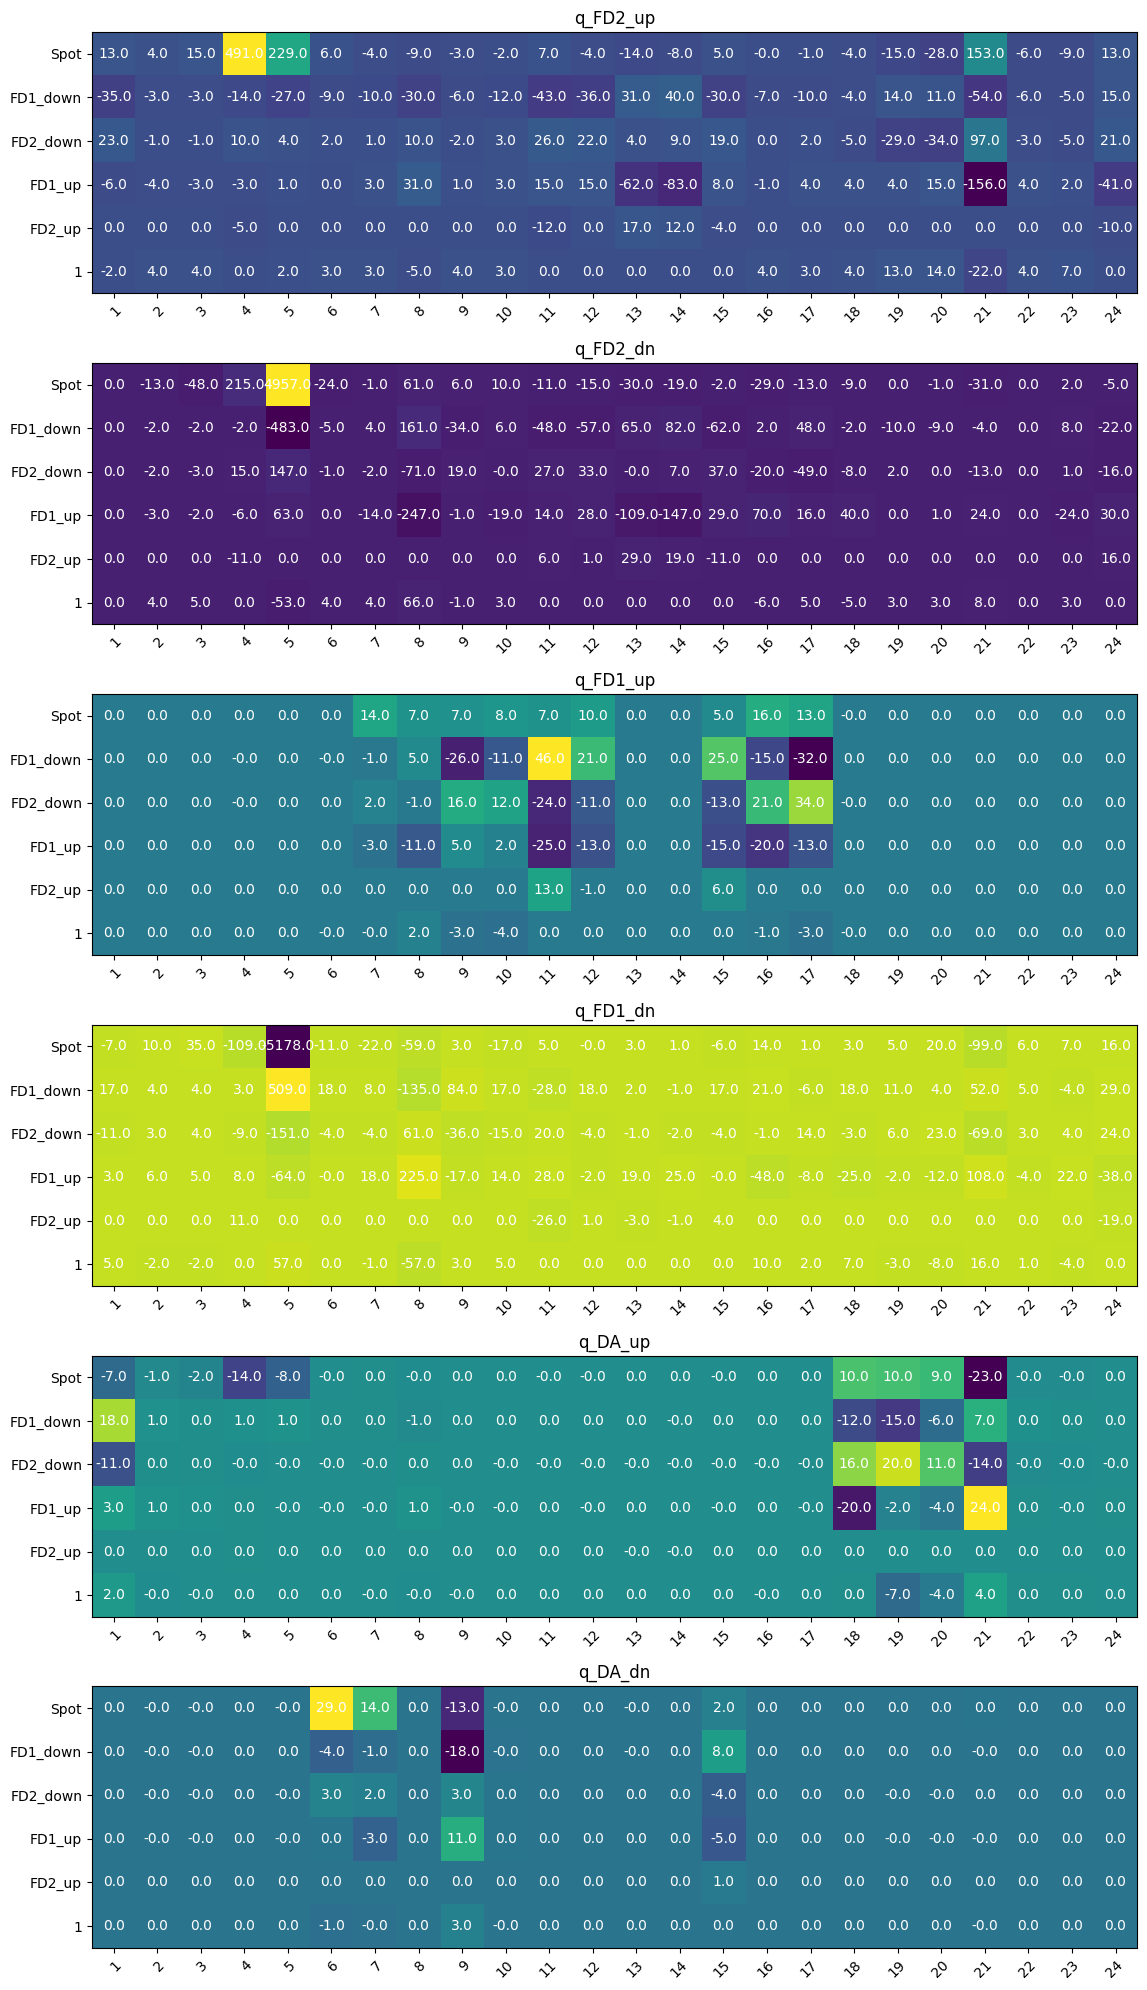

In [123]:
plot_coefficients_heatmap(results['Learn']['Bid'])
plt.show()

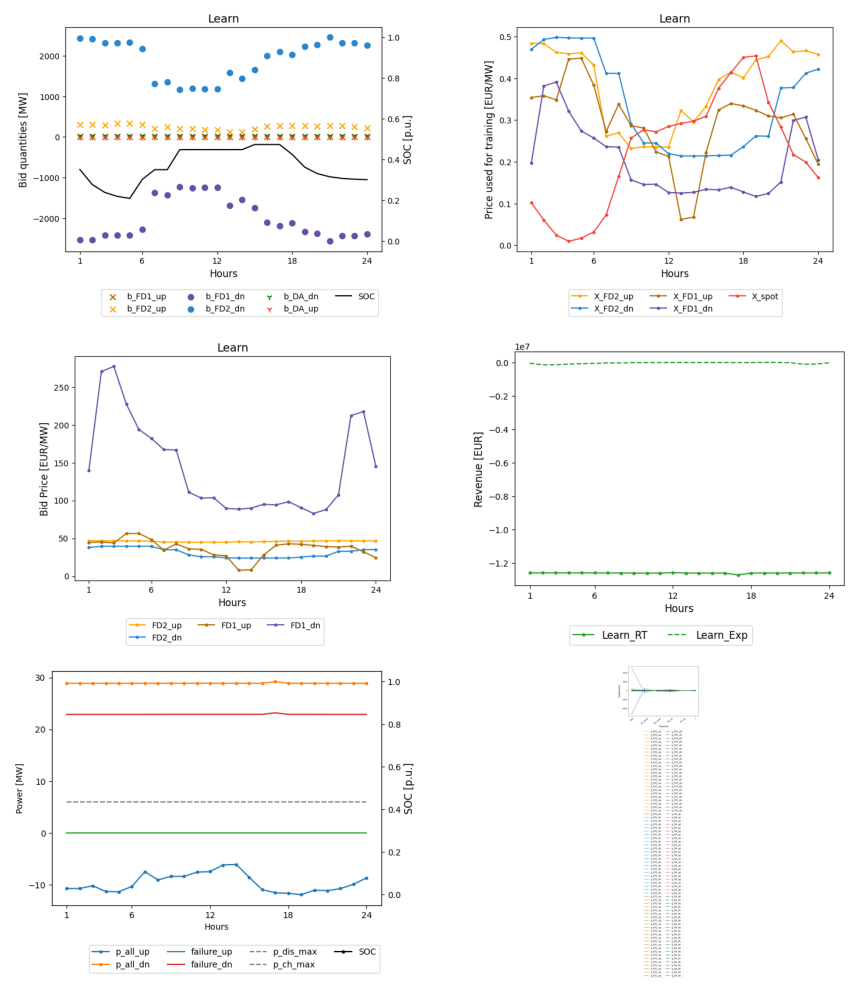

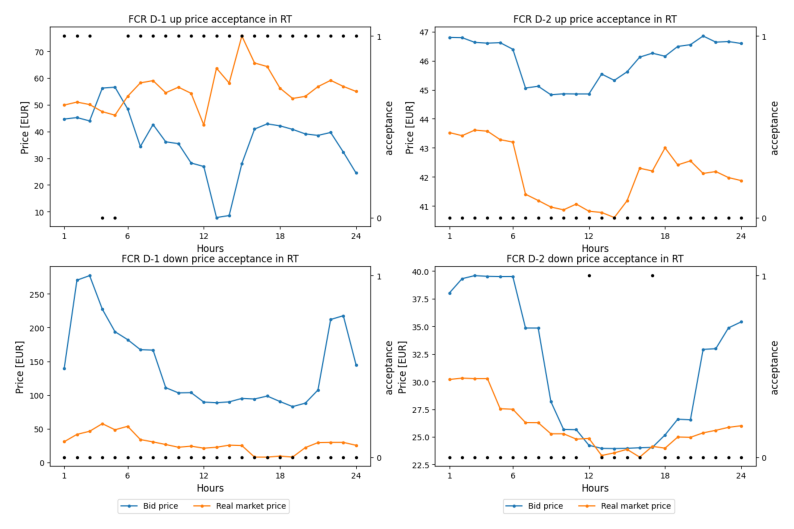

In [25]:
#View plots
view_plots(model, rev_plot)


Investigate why SOC in the last hour shoots up to 8 in the rule-based model

### Test case: M1 D9 t10 
Case when stochastic model performs the best

In [109]:
# Select plot parameters
choose_id = 'm1_d9_t10'
save = True #True or False
model = 'Learn' # Rule, Det, Sto, Learn,
rev_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
save_plots(current_directory, choose_id, save, model, with_acceptance, rev_plot)

Test case:  m1_d9_t10
+----------+---------+-----------------+--------------+------------+
|          |    Rule |   Deterministic |   Stochastic |   Learning |
+==========+=========+=================+==============+============+
| RT       | 1353.16 |          5224.2 |      5642.15 |    4204.78 |
+----------+---------+-----------------+--------------+------------+
| Expected | 3626.02 |          5261.5 |      4934.97 |    4701.33 |
+----------+---------+-----------------+--------------+------------+


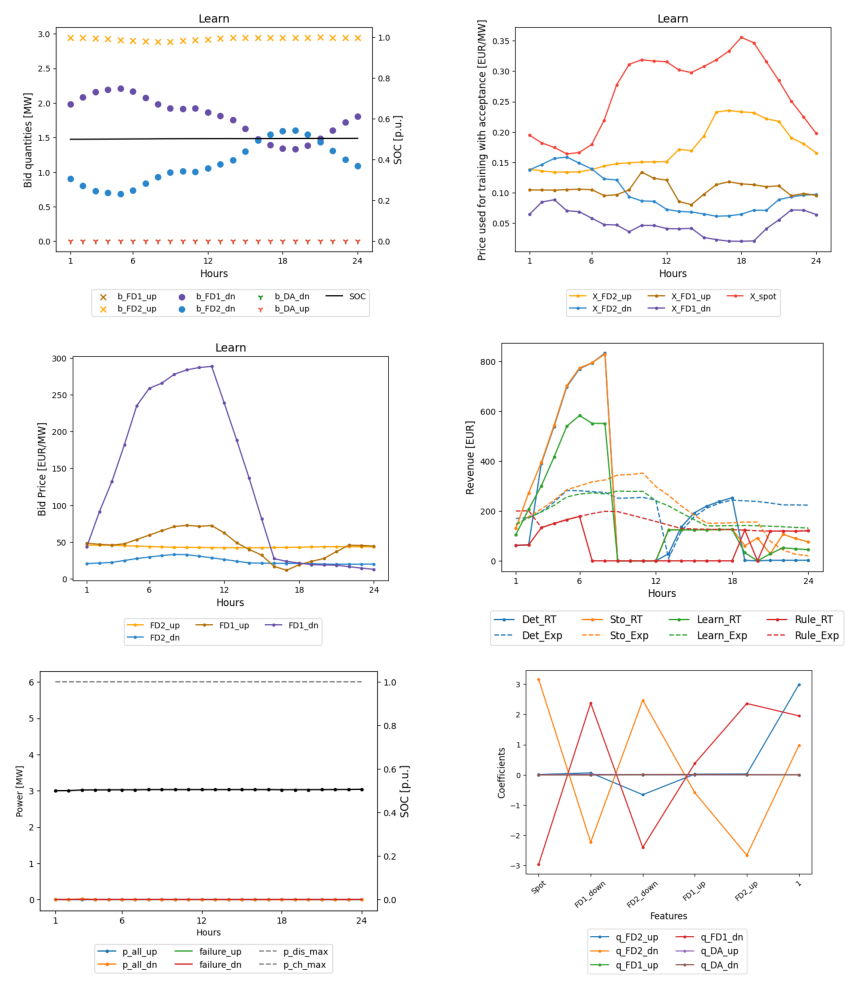

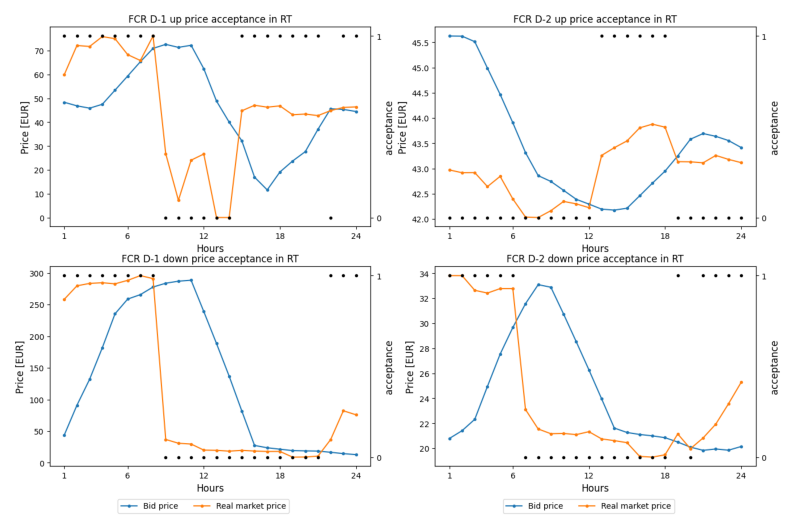

In [111]:
#View plots
model = 'Learn' # Rule, Det, Sto, Learn,
rev_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
view_plots(model, rev_plot)

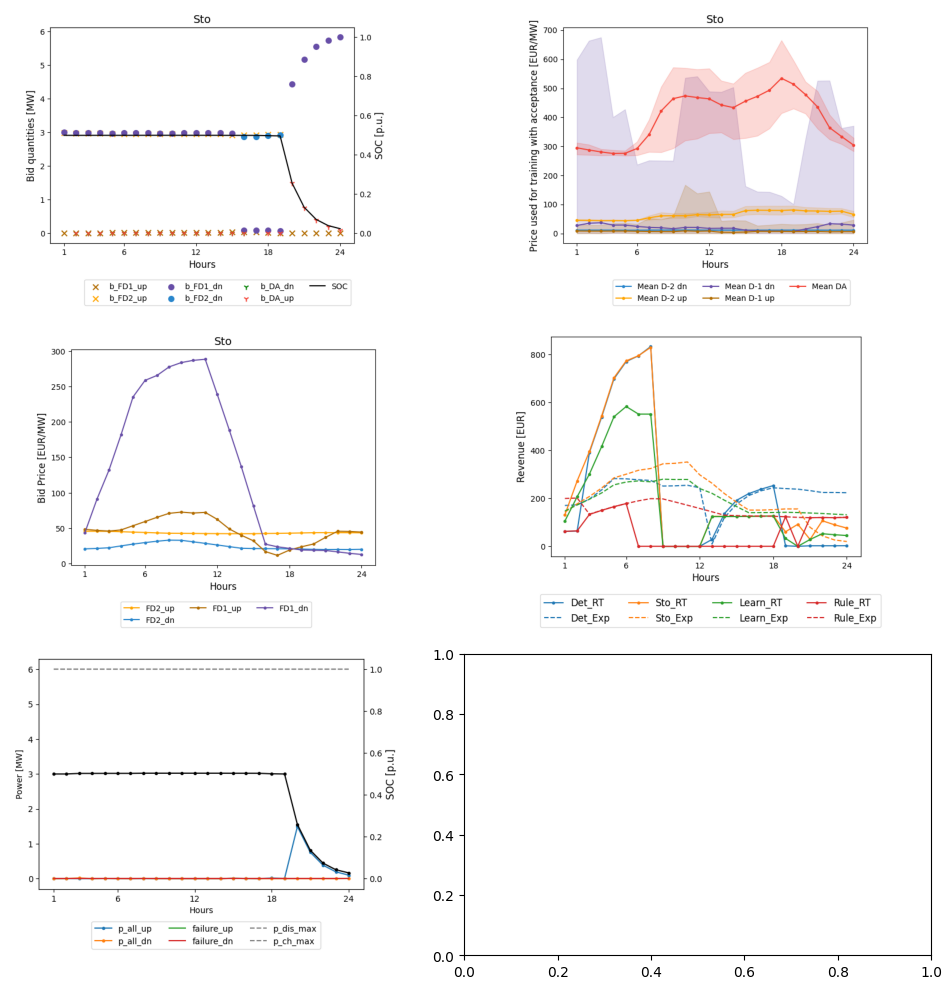

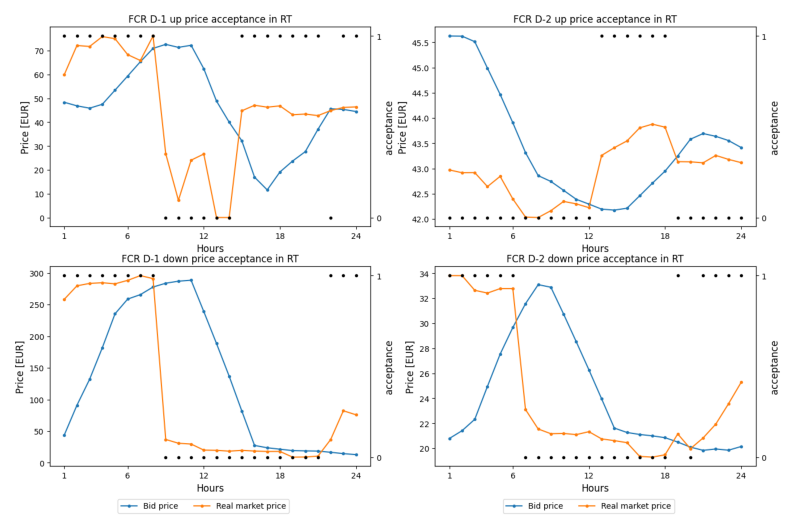

In [97]:
#View plots
model = 'Sto' # Rule, Det, Sto, Learn,
rev_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
view_plots(model, rev_plot)